### Q1. Data Analyst Task at an E-commerce Company
You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, and generate visual insights to help the business make informed decisions.

#### Instructions
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the questions step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
   - Well-documented code and clear comments.
   - Markdown explanations for each step.
   - Screenshots of the plots and outputs.

#### Part I: Randomized Sales Data Generation (NumPy)
1. Initialize Random Seed.
2. Generate Sales Data:
   - Create a NumPy array of random sales data for 12 months (shape = (12,4)), where each column represents a product category: Electronics, Clothing, Home & Kitchen, Sports.
   - Sales values should be between 1000 and 5000 units per month.
   - The range should be randomized using the seed.
3. Convert to DataFrame:
   - Convert the cleaned NumPy array into a Pandas DataFrame with:
     i. Columns: Electronics, Clothing, Home & Kitchen, Sports
     ii. Index: Months from Jan to Dec

#### Part II: Data Manipulation and Analysis (Pandas)
1. Display the first 5 rows and summary statistics of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecutive months for each category.
4. Add the following columns to the DataFrame:
   - Total Sales: Sum of all categories per month.
   - Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
   - If your roll number is even, apply a 10% discount to the Electronics category.
   - If odd, apply a 15% discount to the Clothing category.

#### Part III: Visualizations (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
   - Box plots to show the sales distribution for each category.

First 5 rows:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         1621      4665            4760    1818
Feb         4048      1827            3963    1668
Mar         4246      1015            3909    1092
Apr         1851      4225            2380    3670
May         1422      2459            2671    1788

Summary Statistics:
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2806.083333  2902.416667     3352.083333  2812.250000
std    1137.716729  1383.172471     1005.948350  1240.732711
min    1345.000000  1015.000000     1620.000000  1092.000000
25%    1793.500000  1865.250000     2598.250000  1758.000000
50%    2577.500000  2590.500000     3811.500000  2946.000000
75%    4058.000000  4314.750000     4009.500000  3873.000000
max    4246.000000  4834.000000     4760.000000  4394.000000


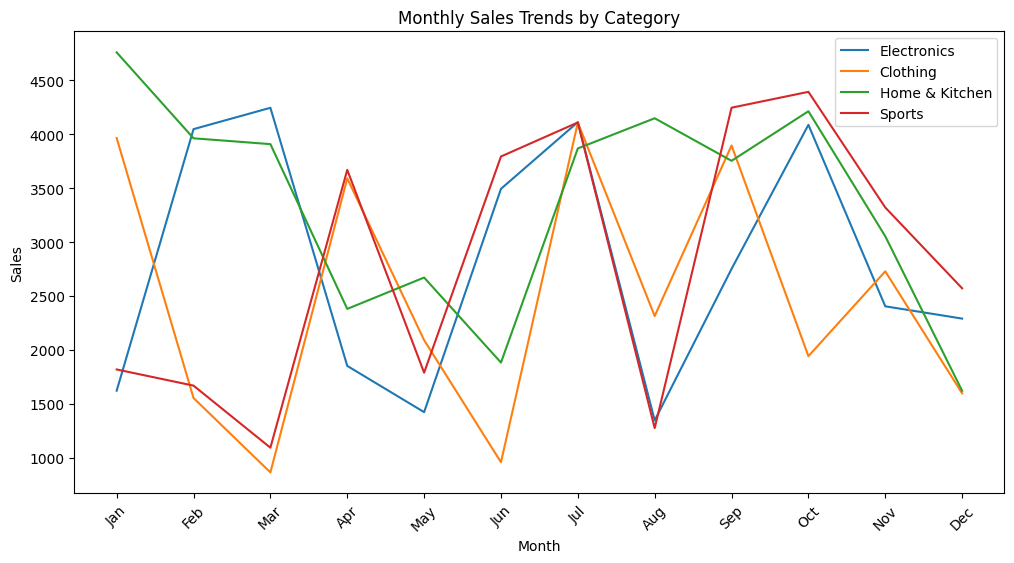

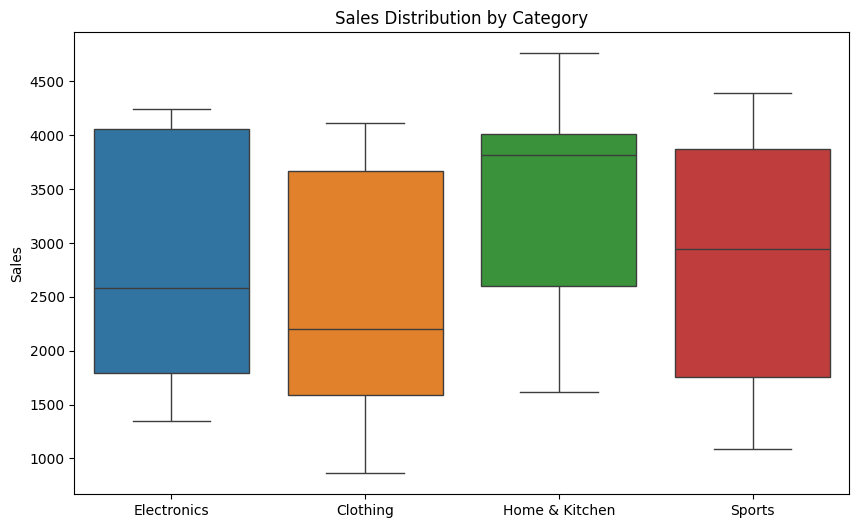

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

roll_number = 102367009

np.random.seed(roll_number)
sales_data = np.random.randint(1000, 5001, size=(12, 4)) 

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
df = pd.DataFrame(sales_data, index=months, columns=categories)

print("First 5 rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

total_per_category = df.sum()
total_per_month = df.sum(axis=1)
growth_rates = df.pct_change().mean() * 100

df['Total Sales'] = total_per_month
df['Growth Rate'] = df['Total Sales'].pct_change() * 100

if roll_number % 2 == 0: 
    df['Electronics'] = df['Electronics'] * 0.9 
else: 
    df['Clothing'] = df['Clothing'] * 0.85

plt.figure(figsize=(12, 6))
for column in categories:
    plt.plot(df.index, df[column], label=column)
plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[categories])
plt.title('Sales Distribution by Category')
plt.ylabel('Sales')
plt.show()

### Q2. NumPy Array Operations
For the array: `array = np.array([[1, -2, 3], [-4, 5, -6]])`
i. Find element-wise absolute value.
ii. Find the 25th, 50th, and 75th percentile of:
   - Flattened array
   - Each column
   - Each row
iii. Calculate the Mean, Median, and Standard Deviation of:
   - Flattened array
   - Each column
   - Each row

In [2]:
array = np.array([[1, -2, 3], [-4, 5, -6]])

abs_array = np.abs(array)

flat_percentiles = np.percentile(array.flatten(), [25, 50, 75])
col_percentiles = np.percentile(array, [25, 50, 75], axis=0)
row_percentiles = np.percentile(array, [25, 50, 75], axis=1)

flat_mean = np.mean(array)
flat_median = np.median(array)
flat_std = np.std(array)
col_stats = [np.mean(array, axis=0), np.median(array, axis=0), np.std(array, axis=0)]
row_stats = [np.mean(array, axis=1), np.median(array, axis=1), np.std(array, axis=1)]

print("Absolute values:\n", abs_array)
print("Flat percentiles (25th, 50th, 75th):", flat_percentiles)
print("Column percentiles:\n", col_percentiles)
print("Row percentiles:\n", row_percentiles)
print("Flat stats - Mean:", flat_mean, "Median:", flat_median, "Std:", flat_std)
print("Column stats - Mean:", col_stats[0], "Median:", col_stats[1], "Std:", col_stats[2])
print("Row stats - Mean:", row_stats[0], "Median:", row_stats[1], "Std:", row_stats[2])

Absolute values:
 [[1 2 3]
 [4 5 6]]
Flat percentiles (25th, 50th, 75th): [-3.5 -0.5  2.5]
Column percentiles:
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Row percentiles:
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]
Flat stats - Mean: -0.5 Median: -0.5 Std: 3.8622100754188224
Column stats - Mean: [-1.5  1.5 -1.5] Median: [-1.5  1.5 -1.5] Std: [2.5 3.5 4.5]
Row stats - Mean: [ 0.66666667 -1.66666667] Median: [ 1. -4.] Std: [2.05480467 4.78423336]


### Q3. NumPy Mathematical Operations
For the array: `a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])`
i. Find:
   - Floor values
   - Ceiling values
   - Truncated values
   - Rounded values

In [3]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

floor_vals = np.floor(a)
ceil_vals = np.ceil(a)
trunc_vals = np.trunc(a)
round_vals = np.round(a)

print("Original array:", a)
print("Floor:", floor_vals)
print("Ceiling:", ceil_vals)
print("Truncated:", trunc_vals)
print("Rounded:", round_vals)

Original array: [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]
Floor: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling: [-1. -1. -0.  1.  2.  2.  3.]
Truncated: [-1. -1. -0.  0.  1.  1.  3.]
Rounded: [-2. -2. -0.  0.  2.  2.  3.]


### Q4. Swap Two Elements in a List
Write a Python program (WAP) to swap two elements in a list using a temporary variable.

In [4]:
def swap_list_elements(lst, pos1, pos2):
    temp = lst[pos1]
    lst[pos1] = lst[pos2]
    lst[pos2] = temp
    return lst

sample_list = [1, 2, 3, 4]
print("Original list:", sample_list)
print("After swapping positions 1 and 2:", swap_list_elements(sample_list, 1, 2))

Original list: [1, 2, 3, 4]
After swapping positions 1 and 2: [1, 3, 2, 4]


### Q5. Swap Two Elements in a Set
Write a Python program to swap two elements in a set by converting it to a list first.

In [5]:
def swap_set_elements(input_set, pos1, pos2):
    temp_list = list(input_set)
    temp = temp_list[pos1]
    temp_list[pos1] = temp_list[pos2]
    temp_list[pos2] = temp
    return set(temp_list)

sample_set = {1, 2, 3, 4}
print("Original set:", sample_set)
print("After swapping positions 0 and 1:", swap_set_elements(sample_set, 0, 1))

Original set: {1, 2, 3, 4}
After swapping positions 0 and 1: {1, 2, 3, 4}
